Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos.
Este conjunto de datos presenta transacciones ocurridas en dos días, donde se registraron 492 fraudes de un total de 284.807 transacciones. El conjunto de datos presenta un alto desequilibrio: la clase positiva (fraudes) representa el 0,172 % del total de transacciones.

Contiene únicamente variables de entrada numéricas resultantes de una transformación PCA. Lamentablemente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos con PCA; las únicas características que no se han transformado con PCA son «Tiempo» e «Importe». La característica «Tiempo» contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica «Importe» es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible a los costes según el ejemplo. La característica «Clase» es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dada la tasa de desequilibrio de clases, recomendamos medir la precisión mediante el área bajo la curva de precisión-recuperación (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.

El conjunto de datos se recopiló y analizó durante una colaboración de investigación entre Worldline y el Grupo de Aprendizaje Automático ( http://mlg.ulb.ac.be ) de la ULB (Universidad Libre de Bruselas) sobre minería de big data y detección de fraude.
Para más información sobre proyectos actuales y anteriores sobre temas relacionados, visite http://mlg.ulb.ac.be/BruFence y http://mlg.ulb.ac.be/ARTML .

## Objetivo:
Predecir el fraude con tarjetas de crédito en los datos transaccionales. 

    Se Utilizara Logistic Regresion y TensorFlow para construir el modelo predictivo
    
Para esto primero haremos una exploración de los datos, despues una construcción de la red neuronal y por ultimo la visualización de los datos con power bi

In [1]:
# ==============================================================================
# FASE 1: PREPARACIÓN Y PREPROCESAMIENTO DE DATOS
# ==============================================================================

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# ==============================================================================
# 1. Carga y exploración inicial de los datos
# ==============================================================================

print("Paso 1: Carga de datos...")
try:
    df = pd.read_csv("C:/Users/Jesus Eduardo/Documents/Bank marketing/Marketing bancario/creditcard.csv")
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'creditcard.csv' no fue encontrado. ")
   
    exit()

# Primeras 5 filas para inspeccionar
print("\nPrimeras 5 filas del dataset:")
print(df.head())

Paso 1: Carga de datos...
Datos cargados correctamente.

Primeras 5 filas del dataset:
   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

In [2]:
# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

In [3]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.38024

In [4]:
# ==============================================================================
# 2. Análisis Exploratorio de Datos (EDA)
# ==============================================================================

print("\nPaso 2: Análisis Exploratorio de Datos (EDA)...")

# Contar el número de transacciones fraudulentas y no fraudulentas
print("\nDistribución de la clase (Fraude vs. No Fraude):")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)


Paso 2: Análisis Exploratorio de Datos (EDA)...

Distribución de la clase (Fraude vs. No Fraude):
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


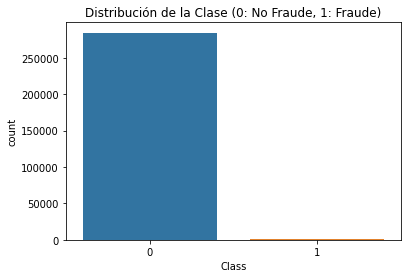

In [5]:
# Visualización de la distribución de la clase
sns.countplot(x='Class', data=df)
plt.title('Distribución de la Clase (0: No Fraude, 1: Fraude)')
plt.show()


Distribución de la cantidad ('Amount') en transacciones fraudulentas vs. no fraudulentas:


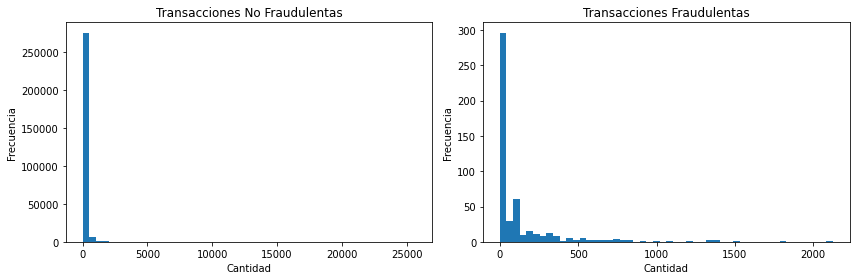

In [6]:
# Distribución de la 'Amount' para transacciones fraudulentas y no fraudulentas
print("\nDistribución de la cantidad ('Amount') en transacciones fraudulentas vs. no fraudulentas:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
bins = 50

ax1.hist(df['Amount'][df['Class'] == 0], bins=bins)
ax1.set_title('Transacciones No Fraudulentas')
ax1.set_xlabel('Cantidad')
ax1.set_ylabel('Frecuencia')

ax2.hist(df['Amount'][df['Class'] == 1], bins=bins)
ax2.set_title('Transacciones Fraudulentas')
ax2.set_xlabel('Cantidad')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Pódemos ver que la cantidad es mayor en las transacciones fraudulentas


Distribución de 'Time' para transacciones fraudulentas y no fraudulentas:


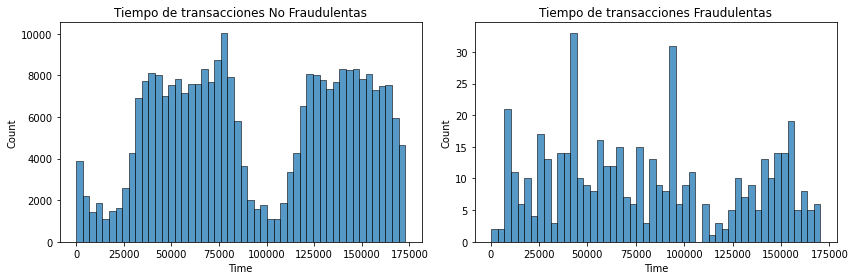

In [7]:
# Visualización de 'Time' para ambas clases
print("\nDistribución de 'Time' para transacciones fraudulentas y no fraudulentas:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Time'][df['Class'] == 0], bins=50, ax=ax1)
ax1.set_title('Tiempo de transacciones No Fraudulentas')

sns.histplot(df['Time'][df['Class'] == 1], bins=50, ax=ax2)
ax2.set_title('Tiempo de transacciones Fraudulentas')

plt.tight_layout()
plt.show()

Podemos ver un patron un poco oscilante en las transacciones no fraudulentas

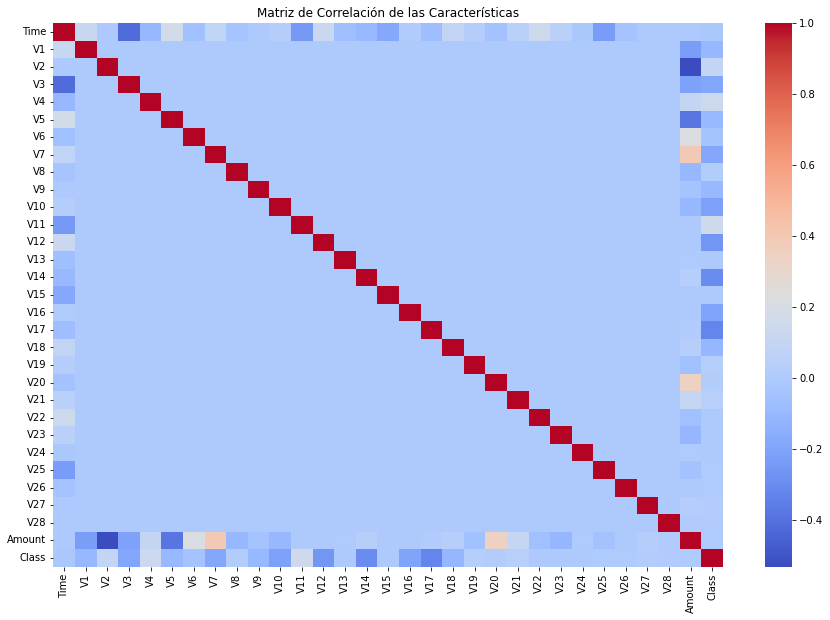


Correlación de las características con la clase:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [8]:
# Correlación de las características con la clase 'Class'
# Las columnas V1-V28 ya están preprocesadas por (PCA)
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características')
plt.show()

print("\nCorrelación de las características con la clase:")
print(correlation_matrix['Class'].sort_values(ascending=False))

In [9]:
# ==============================================================================
# 3. Preprocesamiento de los datos
# ==============================================================================

print("\nPaso 3: Preprocesamiento de los datos...")

# Las variables 'V' están escaladas, pero 'Amount' y 'Time' no.
# Estandarizar 'Amount' y 'Time'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Eliminar las columnas originales 'Amount' y 'Time'
df.drop(['Amount', 'Time'], axis=1, inplace=True)



Paso 3: Preprocesamiento de los datos...


In [10]:
# ==============================================================================
# 4. Manejo del desequilibrio de clases
# ==============================================================================

# El dataset está muy desequilibrado.
# Una técnica común es el 'undersampling' para equilibrar los datos de entrenamiento.

# Dividir el dataset en variables predictoras (X) y variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDistribución de la clase en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de la clase en el conjunto de prueba:")
print(y_test.value_counts())



Distribución de la clase en el conjunto de entrenamiento:
Class
0    227451
1       394
Name: count, dtype: int64

Distribución de la clase en el conjunto de prueba:
Class
0    56864
1       98
Name: count, dtype: int64


## Equilibrando datos con el metodo "SMOTE"


In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("\nDistribución de la clase después del undersampling:")
print(y_train_res.value_counts())


Distribución de la clase después del undersampling:
Class
0    227451
1    227451
Name: count, dtype: int64


<Axes: xlabel='Class'>

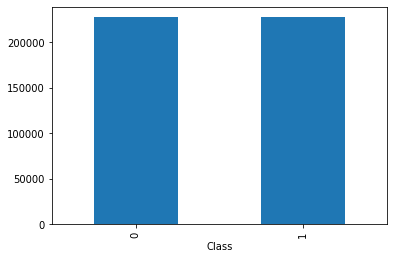

In [12]:
#Veamos si esta equilibrado
pd.Series(y_train_res).value_counts().plot(kind="bar")

In [13]:
# Guardar los datos preprocesados para la siguiente fase
X_train_res.to_csv('X_train_res.csv', index=False)
y_train_res.to_csv('y_train_res.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\n¡Preparación y preprocesamiento de datos completado!")
print("Los datos preprocesados han sido guardados para la siguiente fase.")


¡Preparación y preprocesamiento de datos completado!
Los datos preprocesados han sido guardados para la siguiente fase.


In [14]:
# ==============================================================================
# FASE 2: MODELADO Y EVALUACIÓN DE MACHINE LEARNING
# ==============================================================================

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 1. Cargar los datos preprocesados
# ==============================================================================

print("Paso 1: Cargando datos preprocesados...")
try:
    X_train_res = pd.read_csv('X_train_res.csv')
    y_train_res = pd.read_csv('y_train_res.csv').squeeze() # .squeeze() convierte el DataFrame de 1 columna a Series
    X_test = pd.read_csv('X_test.csv')
    y_test = pd.read_csv('y_test.csv').squeeze()
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: Los archivos de datos preprocesados no fueron encontrados.")
    exit()

Paso 1: Cargando datos preprocesados...
Datos cargados correctamente.


In [32]:
# ==============================================================================
# 2. Entrenamiento de modelos de Machine Learning
# ==============================================================================

print("\nPaso 2: Entrenando modelos de Machine Learning...")

# Definir los modelos a utilizar
models = {
    "Regresión Logística": LogisticRegression(random_state=42, solver='liblinear'),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
    # SVM es muy lento con este dataset, lo omitimos por simplicidad pero se podría considerar
     #"SVM": SVC(random_state=42, probability=True)
}

# Diccionario para almacenar los resultados
results = {}

for name, model in models.items():
    print(f"\nEntrenando modelo: {name}...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Almacenar métricas importantes
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    print(f"Modelo {name} entrenado y evaluado.")


Paso 2: Entrenando modelos de Machine Learning...

Entrenando modelo: Regresión Logística...
Modelo Regresión Logística entrenado y evaluado.

Entrenando modelo: Árbol de Decisión...
Modelo Árbol de Decisión entrenado y evaluado.

Entrenando modelo: Random Forest...
Modelo Random Forest entrenado y evaluado.



Paso 3: Análisis de rendimiento de los modelos...

Rendimiento del modelo: Regresión Logística

Matriz de Confusión:


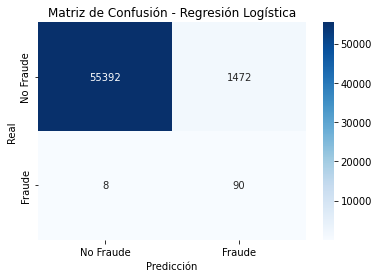


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Área bajo la curva ROC (AUC): 0.9703


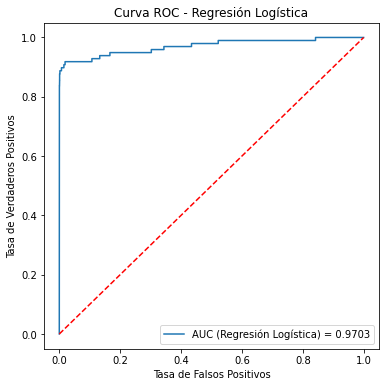


Rendimiento del modelo: Árbol de Decisión

Matriz de Confusión:


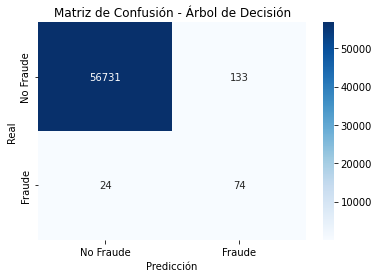


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.76      0.49        98

    accuracy                           1.00     56962
   macro avg       0.68      0.88      0.74     56962
weighted avg       1.00      1.00      1.00     56962

Área bajo la curva ROC (AUC): 0.8764


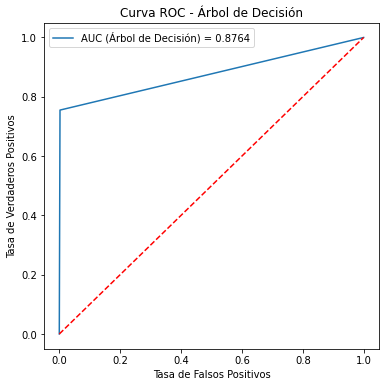


Rendimiento del modelo: Random Forest

Matriz de Confusión:


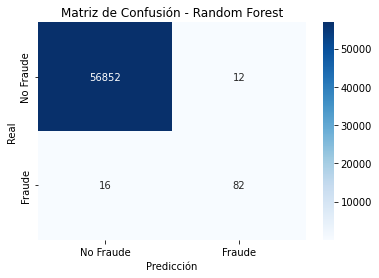


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Área bajo la curva ROC (AUC): 0.9735


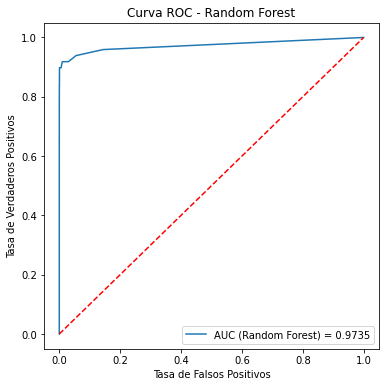

In [33]:
# ==============================================================================
# 3. Análisis de Rendimiento y Patrones de Fraude
# ==============================================================================

print("\nPaso 3: Análisis de rendimiento de los modelos...")

for name, res in results.items():
    print(f"\n==============================================")
    print(f"Rendimiento del modelo: {name}")
    print(f"==============================================")

    # Matriz de Confusión
    print("\nMatriz de Confusión:")
    cm = res['confusion_matrix']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    print(res['classification_report'])

    # Curva ROC y AUC
    print(f"Área bajo la curva ROC (AUC): {res['roc_auc']:.4f}")
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC ({name}) = {res["roc_auc"]:.4f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'Curva ROC - {name}')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend()
    plt.show()

## Random forest es el que mejor rendimiento tuvo en varios aspectos

Exploracion mas afondo de el arbol de decision y random forest, encontrando mejores hiperparametros

In [ ]:
#=================================================================================================

In [ ]:
#================================================================================================

In [34]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
import joblib

# Cargar los datos preprocesados
try:
    X_train_res = pd.read_csv('X_train_res.csv')
    y_train_res = pd.read_csv('y_train_res.csv').squeeze()
    X_test = pd.read_csv('X_test.csv')
    y_test = pd.read_csv('y_test.csv').squeeze()
except FileNotFoundError:
    print("Error: Asegúrate de haber ejecutado los notebooks anteriores.")
    exit()

# Definir el modelo
dtree = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros a buscar
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
# cv=5 significa validación cruzada con 5 pliegues(Ayuda a evitar el sobreajuste (overfitting))
# scoring='roc_auc' porque queremos optimizar el área bajo la curva ROC
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

print("Iniciando la búsqueda de los mejores hiperparámetros...")
grid_search.fit(X_train_res, y_train_res)

# Imprimir los mejores parámetros encontrados
print("\nLos mejores parámetros encontrados son:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_dtree = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_dtree.predict(X_test)
y_pred_proba = best_dtree.predict_proba(X_test)[:, 1]

print("\n----------------------------------------------")
print("Rendimiento del Árbol de Decisión optimizado:")
print("----------------------------------------------")
print(f"Área bajo la curva ROC (AUC): {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Guardar el modelo optimizado
joblib.dump(best_dtree, 'best_dtree_optimized.pkl')
print("\nModelo de Árbol de Decisión optimizado guardado como 'best_dtree_optimized.pkl'.")

Iniciando la búsqueda de los mejores hiperparámetros...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Los mejores parámetros encontrados son:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

----------------------------------------------
Rendimiento del Árbol de Decisión optimizado:
----------------------------------------------
Área bajo la curva ROC (AUC): 0.9276

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.85      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.92      0.78     56962
weighted avg       1.00      1.00      1.00     56962


Modelo de Árbol de Decisión optimizado guardado como 'best_dtree_optimized.pkl'.


In [35]:
# ==============================================================================
# FASE 4: CREACIÓN DE REGLAS ANTIFRAUDE A PARTIR DEL MODELO DE ÁRBOL DE DECISIÓN
# ==============================================================================

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import joblib
from sklearn.tree import DecisionTreeClassifier

# ==============================================================================
# 1. Cargar el modelo de Árbol de Decisión optimizado
# ==============================================================================

print("Paso 1: Cargando el modelo de Árbol de Decisión optimizado...")
try:
    best_dtree = joblib.load('best_dtree_optimized.pkl')
    # También cargamos los datos de prueba para obtener los nombres de las columnas
    X_test = pd.read_csv('X_test.csv')
    feature_names = list(X_test.columns)
    print("Modelo y nombres de características cargados correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'best_dtree_optimized.pkl' o 'X_test.csv' no fue encontrado.")
    print("Asegúrate de haber ejecutado '01_preparacion_datos.ipynb' y '03_optimizacion_arbol_decision.ipynb' primero.")
    exit()

Paso 1: Cargando el modelo de Árbol de Decisión optimizado...
Modelo y nombres de características cargados correctamente.


In [36]:
# ==============================================================================
# 2. Función para extraer las reglas del árbol
# ==============================================================================

def get_rules(tree, feature_names):
    """
    Función recursiva para extraer las reglas de un árbol de decisión.
    
    Args:
        tree (DecisionTreeClassifier): El modelo de árbol de decisión entrenado.
        feature_names (list): Lista con los nombres de las características.
    
    Returns:
        list: Una lista de reglas antifraude en formato de string.
    """
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = tree.tree_.feature
    value = tree.tree_.value

    rules = []
    
    def recurse(node, parent_rule=""):
        if left[node] == -1 and right[node] == -1:  # Es un nodo hoja
            # La hoja tiene la clasificación de fraude si la clase 1 es mayor que la 0
            if value[node][0][1] > value[node][0][0]:
                rules.append(parent_rule)
            return

        # Es un nodo de división
        feature = feature_names[features[node]]
        thresh = threshold[node]

        # Condición para la rama izquierda
        left_rule = f"{parent_rule} and " if parent_rule else ""
        left_rule += f"{feature} <= {thresh:.4f}"
        recurse(left[node], left_rule)

        # Condición para la rama derecha
        right_rule = f"{parent_rule} and " if parent_rule else ""
        right_rule += f"{feature} > {thresh:.4f}"
        recurse(right[node], right_rule)
    
    # Iniciar la recursión desde el nodo raíz (0)
    recurse(0)
    return rules

In [37]:
# ==============================================================================
# 3. Extraer y visualizar las reglas antifraude
# ==============================================================================

print("\nPaso 3: Extrayendo las reglas antifraude del modelo...")
fraud_rules = get_rules(best_dtree, feature_names)

print(f"\nSe han encontrado {len(fraud_rules)} reglas que conducen a la detección de fraude.\n")
print("Ejemplos de las reglas más importantes:")

# Mostrar las primeras 10 reglas para no saturar la salida
for i, rule in enumerate(fraud_rules[:10]):
    print(f"Regla {i+1}: {rule}")


Paso 3: Extrayendo las reglas antifraude del modelo...

Se han encontrado 199 reglas que conducen a la detección de fraude.

Ejemplos de las reglas más importantes:
Regla 1: V14 <= -1.8152 and V12 <= -1.8580 and V10 <= 0.5989 and V16 <= 0.5459 and V14 <= -3.1819 and V26 <= -0.2646 and Time_scaled <= -1.3612 and V10 > -6.1815
Regla 2: V14 <= -1.8152 and V12 <= -1.8580 and V10 <= 0.5989 and V16 <= 0.5459 and V14 <= -3.1819 and V26 <= -0.2646 and Time_scaled > -1.3612 and V26 <= -0.2646 and V27 <= 0.5760
Regla 3: V14 <= -1.8152 and V12 <= -1.8580 and V10 <= 0.5989 and V16 <= 0.5459 and V14 <= -3.1819 and V26 <= -0.2646 and Time_scaled > -1.3612 and V26 <= -0.2646 and V27 > 0.5760 and V27 <= 0.5761
Regla 4: V14 <= -1.8152 and V12 <= -1.8580 and V10 <= 0.5989 and V16 <= 0.5459 and V14 <= -3.1819 and V26 <= -0.2646 and Time_scaled > -1.3612 and V26 <= -0.2646 and V27 > 0.5760 and V27 > 0.5761 and Amount_scaled <= -0.3452 and V24 <= -0.0034 and V6 > -1.8058
Regla 5: V14 <= -1.8152 and V12 <=

In [52]:
# ==============================================================================
# 4. Interpretación y aplicación de las reglas
# ==============================================================================

print("\n--- Interpretación de las Reglas ---")
print("Cada regla es una combinación de condiciones que, si se cumplen, el modelo clasifica una transacción como fraude.")
print("Para la primera regla decision tree nos arrojo lo siguiente que podria covertirse en una regla:  V14 <= -1.8152 and V12 <= -1.8580 <= -0.2646 and Time_scaled <= -1.3612  significa que las transacciones con esas características y valores son de alto riesgo.")
print("\n--- Traducción a la Estrategia Antifraude ---")
print("Estas reglas pueden ser implementadas en tu sistema de gestión de fraude de las siguientes maneras:")
print("- **Reglas de Detección:** Si una transacción entrante cumple con alguna de estas reglas, se activa una alerta para ser revisada por un analista.")
print("- **Reglas de Rechazo Automático:** Las reglas de alto riesgo (con umbrales muy estrictos) pueden llevar al rechazo automático de la transacción.")
print("- **Reglas de Verificación Adicional:** Si una transacción cumple con una de estas reglas, se puede solicitar una verificación de identidad adicional al cliente (por ejemplo, un código de un solo uso).")
print("\n En nuestro caso, haciendo uso de la primera regla podemos hacer lo siguiente:\nIF (V14 <= -1.8152 AND V12 <= -1.8580 AND Time_scaled <= -1.3612)")
print("THEN Action = 'Alert' OR 'Decline'")
print("\n--- Conocimiento del Área de Pagos ---")
print("Es crucial que un analista de fraude (con conocimiento en el área de pagos) revise estas reglas para validarlas. Por ejemplo, la regla 'V14 <= -1.8152' por sí sola puede no tener sentido para un humano, pero el analista puede contextualizarla")



--- Interpretación de las Reglas ---
Cada regla es una combinación de condiciones que, si se cumplen, el modelo clasifica una transacción como fraude.
Para la primera regla decision tree nos arrojo lo siguiente que podria covertirse en una regla:  V14 <= -1.8152 and V12 <= -1.8580 <= -0.2646 and Time_scaled <= -1.3612  significa que las transacciones con esas características y valores son de alto riesgo.

--- Traducción a la Estrategia Antifraude ---
Estas reglas pueden ser implementadas en tu sistema de gestión de fraude de las siguientes maneras:
- **Reglas de Detección:** Si una transacción entrante cumple con alguna de estas reglas, se activa una alerta para ser revisada por un analista.
- **Reglas de Rechazo Automático:** Las reglas de alto riesgo (con umbrales muy estrictos) pueden llevar al rechazo automático de la transacción.
- **Reglas de Verificación Adicional:** Si una transacción cumple con una de estas reglas, se puede solicitar una verificación de identidad adicional al

In [54]:
!pip install shap

In [1]:
# ==============================================================================
# FASE 2 - PARTE 2: MODELO DE ENSAMBLE Y ANÁLISIS DE INTERPRETABILIDAD CON SHAP
# ==============================================================================

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ==============================================================================
# 1. Cargar los datos preprocesados
# ==============================================================================

print("Paso 1: Cargando datos preprocesados...")
try:
    X_train_res = pd.read_csv('X_train_res.csv')
    y_train_res = pd.read_csv('y_train_res.csv').squeeze()
    X_test = pd.read_csv('X_test.csv')
    y_test = pd.read_csv('y_test.csv').squeeze()
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: Los archivos de datos preprocesados no fueron encontrados.")
    print("Asegúrate de haber ejecutado '01_preparacion_datos.ipynb' y '02_modelado_evaluacion.ipynb' primero.")
    exit()

Paso 1: Cargando datos preprocesados...
Datos cargados correctamente.



Paso 2: Entrenando el modelo de Random Forest...

----------------------------------------------
Rendimiento del modelo Random Forest:
----------------------------------------------
Área bajo la curva ROC (AUC): 0.9777

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.87      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962



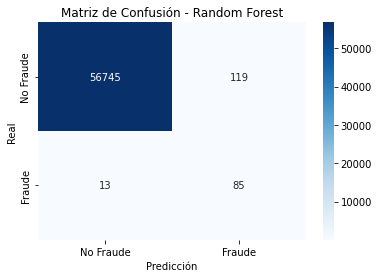


Modelo Random Forest guardado como 'random_forest_model2.pkl'.


In [2]:
# ==============================================================================
# 2. Entrenar el modelo de Random Forest (alto rendimiento)
# ==============================================================================

print("\nPaso 2: Entrenando el modelo de Random Forest...")

# Definir y entrenar el modelo de Random Forest
# Ajustamos los hiperparámetros para un mejor rendimiento
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)

# Evaluar el modelo en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n----------------------------------------------")
print("Rendimiento del modelo Random Forest:")
print("----------------------------------------------")
print(f"Área bajo la curva ROC (AUC): {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión para visualización
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Guardar el modelo entrenado
joblib.dump(rf_model, 'random_forest_model2.pkl')
print("\nModelo Random Forest guardado como 'random_forest_model2.pkl'.")


Paso 3: Analizando la interpretabilidad del modelo con SHAP...
Shape de los valores SHAP para la clase de fraude: (1000, 30, 2)
Shape de los datos de prueba usados en SHAP: (1000, 30)

Análisis Global: Visualizando la importancia general de las características...


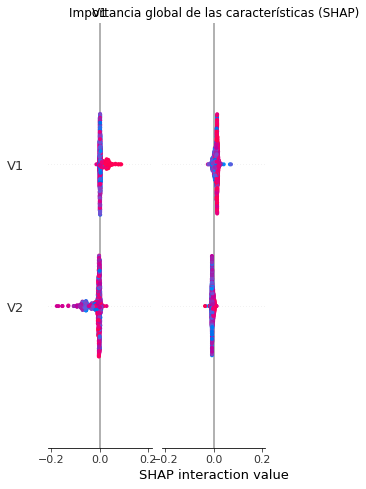

In [3]:
# ==============================================================================
# 3. Analizar la interpretabilidad con SHAP 
# ==============================================================================

print("\nPaso 3: Analizando la interpretabilidad del modelo con SHAP...")

# Inicializar un explainer de SHAP para el modelo Random Forest
# Usar el método "deep" puede ser más robusto si el TreeExplainer falla.
explainer = shap.TreeExplainer(rf_model)

# Seleccionar un subconjunto representativo de los datos de prueba para SHAP
# Mantenemos el tamaño en 1000 para un buen balance entre rendimiento y representatividad.
shap_test_data = X_test.sample(n=1000, random_state=42)

# --- VERIFICACIÓN Y CÁLCULO ALTERNATIVO ---
try:
    # Intenta el cálculo estándar que debería funcionar
    shap_values = explainer.shap_values(shap_test_data)
    
    # Si la salida es una lista, toma la matriz de la clase de fraude (índice 1)
    if isinstance(shap_values, list):
        shap_values_fraud = shap_values[1]
    else:
        # Si no es una lista, la salida ya es la matriz que necesitamos
        shap_values_fraud = shap_values
    
except Exception as e:
    print(f"Error al calcular los valores SHAP: {e}")
    print("Intentando con una versión más robusta del cálculo...")
    
    # Esto a veces soluciona problemas de compatibilidad
    explainer = shap.Explainer(rf_model, shap_test_data)
    shap_values = explainer(shap_test_data)
    
    # Para la visualización, extraemos el .values de la clase de fraude
    if isinstance(shap_values.values, list):
        shap_values_fraud = shap_values.values[1]
    else:
        shap_values_fraud = shap_values.values

# Verificamos la forma de la salida final antes de graficar
print(f"Shape de los valores SHAP para la clase de fraude: {shap_values_fraud.shape}")
print(f"Shape de los datos de prueba usados en SHAP: {shap_test_data.shape}")

# Ahora, el shape debería coincidir y los gráficos se generarán correctamente.

# Análisis Global: Importancia de las características
print("\nAnálisis Global: Visualizando la importancia general de las características...")
shap.summary_plot(shap_values_fraud, shap_test_data, plot_type='bar', show=False)
plt.title("Importancia global de las características (SHAP)")
plt.show()


Análisis Global: Plot de beeswarm para una vista detallada...


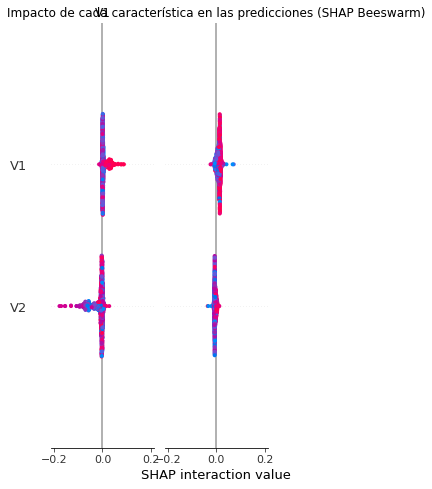

In [4]:
# También puedes usar el plot de abejas (beeswarm) para una visualización más detallada
print("\nAnálisis Global: Plot de beeswarm para una vista detallada...")
shap.summary_plot(shap_values_fraud, shap_test_data, show=False)
plt.title("Impacto de cada característica en las predicciones (SHAP Beeswarm)")
plt.show()


Análisis Global: Plot de beeswarm para una vista detallada...


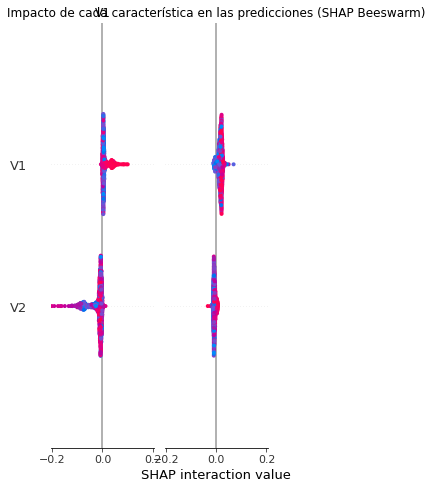

In [20]:
# También puedes usar el plot de abejas (beeswarm) para una visualización más detallada
print("\nAnálisis Global: Plot de beeswarm para una vista detallada...")
shap.summary_plot(shap_values_fraud, shap_test_data, show=False)
plt.title("Impacto de cada característica en las predicciones (SHAP Beeswarm)")
plt.show()

In [5]:
# ==============================================================================
# 4. Análisis Local: Entender transacciones individuales 
# ==============================================================================
print("\nPaso 4: Análisis local de transacciones individuales...")

# Seleccionar un caso de fraude y uno no-fraude para analizar
try:
    fraud_case_index = y_test[y_test == 1].index[0]
    fraud_transaction = X_test.loc[[fraud_case_index]]  # Usar doble corchete para mantener la forma de DataFrame
    non_fraud_case_index = y_test[y_test == 0].index[0]
    non_fraud_transaction = X_test.loc[[non_fraud_case_index]]
except IndexError:
    print("Error: No se encontraron casos de fraude o no-fraude en los datos de prueba.")
    print("Asegúrate de que los datos de prueba contienen ambas clases.")
    exit()

# Calcular los valores SHAP para casos individuales usando el explainer
# Esto devuelve un objeto Explanation de SHAP
shap_case_fraud = explainer(fraud_transaction)
shap_case_non_fraud = explainer(non_fraud_transaction)

print("\nExplicación de una transacción real fraudulenta:")
# La notación de puntos es la más robusta para acceder a los valores
shap.initjs()
shap.plots.force(shap_case_fraud[0, :, 1])


Paso 4: Análisis local de transacciones individuales...

Explicación de una transacción real fraudulenta:


In [6]:
print("\nExplicación de una transacción real no-fraudulenta:")
shap.plots.force(shap_case_non_fraud[0, :, 1])


Explicación de una transacción real no-fraudulenta:


In [7]:
# ==============================================================================
# 4.2 Análisis Local: Entender múltiples transacciones individuales
# ==============================================================================

print("\nPaso 4: Análisis local de transacciones individuales para encontrar patrones...")

# Obtener los índices de todas las transacciones fraudulentas y no fraudulentas
fraud_indices = y_test[y_test == 1].index
non_fraud_indices = y_test[y_test == 0].index

# Seleccionar las primeras 5 transacciones fraudulentas para su análisis
# Puedes cambiar este número según lo necesites
num_to_analyze = 5
if len(fraud_indices) < num_to_analyze:
    print(f"Advertencia: Solo se encontraron {len(fraud_indices)} transacciones fraudulentas. Analizando todas.")
    num_to_analyze = len(fraud_indices)

# Obtener los datos de esas transacciones
multiple_fraud_transactions = X_test.loc[fraud_indices[:num_to_analyze]]

# Calcular los valores SHAP para este conjunto de transacciones fraudulentas
# Esto devolverá un objeto Explanation para todas ellas
shap_cases_fraud = explainer(multiple_fraud_transactions)

# --- Visualizar cada caso de fraude y buscar patrones ---
shap.initjs()

for i in range(num_to_analyze):
    print(f"\nExplicación de la transacción fraudulenta #{i+1}:")
    # Para cada transacción, generamos la gráfica
    # shap_cases_fraud.values es una lista de arrays, uno por cada clase.
    # El índice [0, :, 1] en tu código original se refiere al primer caso, todas las características, y la clase 1.
    # Con el objeto Explanation, podemos acceder de forma más directa.
    shap.plots.force(shap_cases_fraud[i, :, 1])


Paso 4: Análisis local de transacciones individuales para encontrar patrones...



Explicación de la transacción fraudulenta #1:

Explicación de la transacción fraudulenta #2:

Explicación de la transacción fraudulenta #3:

Explicación de la transacción fraudulenta #4:

Explicación de la transacción fraudulenta #5:


In [8]:
# Obtener los índices y datos de las primeras 5 transacciones fraudulentas
fraud_indices = y_test[y_test == 1].index
num_to_analyze = min(5, len(fraud_indices))
multiple_fraud_transactions = X_test.loc[fraud_indices[:num_to_analyze]]

# Calcular los valores SHAP para las 5 transacciones
print("\nCalculando valores SHAP para las primeras 5 transacciones fraudulentas...")
shap_cases_fraud = explainer(multiple_fraud_transactions)
print("Cálculo completado.")


Calculando valores SHAP para las primeras 5 transacciones fraudulentas...
Cálculo completado.


In [9]:
# Caso de Fraude #1
print("\nExplicación de la transacción fraudulenta #1:")
shap.initjs()
shap.plots.force(shap_cases_fraud[0, :, 1])


Explicación de la transacción fraudulenta #1:


In [10]:
# Caso de Fraude #2
print("\nExplicación de la transacción fraudulenta #2:")
shap.initjs()
shap.plots.force(shap_cases_fraud[1, :, 1])


Explicación de la transacción fraudulenta #2:


In [11]:
# Caso de Fraude #3
print("\nExplicación de la transacción fraudulenta #3:")
shap.initjs()
shap.plots.force(shap_cases_fraud[2, :, 1])


Explicación de la transacción fraudulenta #3:


In [12]:
# Caso de Fraude #1
print("\nExplicación de la transacción fraudulenta #1:")
shap.initjs()
shap.plots.force(shap_cases_fraud[3, :, 1])


Explicación de la transacción fraudulenta #1:


In [13]:
# Caso de Fraude #5
print("\nExplicación de la transacción fraudulenta #5:")
shap.initjs()
shap.plots.force(shap_cases_fraud[4, :, 1])


Explicación de la transacción fraudulenta #5:


In [14]:
# --- Resumen para la Creación de Reglas de Alto Riesgo ---
print("\n--- Resumen para la Creación de Reglas de Alto Riesgo ---")
print("Después de analizar las explicaciones, busca las características que aparecen como flechas rojas grandes de forma consistente en la mayoría de las gráficas.")
print("\n En nuestro caso, 'V14' y 'V10' siempre están empujando la predicción de fraude hacia arriba(a excepcion del caso 2 que el segundo que empuja es v4. y el caso 4 que el segundo que empuja es v17), estos son las candidatas más fuertes para nuestras reglas.")
print("'V14' y 'V10' son las candidatas más fuertes para nuestras reglas.")

print("\n Podemos decir que: 'Si V14 < -6.5 Y V10 < -4.8, clasificar como de alto riesgo'.")


--- Resumen para la Creación de Reglas de Alto Riesgo ---
Después de analizar las explicaciones, busca las características que aparecen como flechas rojas grandes de forma consistente en la mayoría de las gráficas.

 En nuestro caso, 'V14' y 'V10' siempre están empujando la predicción de fraude hacia arriba(a excepcion del caso 2 que el segundo que empuja es v4. y el caso 4 que el segundo que empuja es v17), estos son las candidatas más fuertes para nuestras reglas.
'V14' y 'V10' son las candidatas más fuertes para nuestras reglas.

 Podemos decir que: 'Si V14 < -6.5 Y V10 < -4.8, clasificar como de alto riesgo'.


Aunque el modelo de Árbol de Decisión es interpretable, su rendimiento puede ser bajo. Por eso, mi enfoque sería doble: primero, optimizo el Árbol de Decisión para mejorar su precisión lo máximo posible y extraer reglas directamente. Sin embargo, para una detección de fraude más robusta, entrenano un modelo de alto rendimiento como Random Forest y usaría librerías como SHAP o LIME para obtener explicaciones sobre las decisiones más importantes. Esto me permitiría crear reglas antifraude basadas en el modelo más preciso, identificar los patrones de fraude más relevantes y entender la lógica detrás de la detección de forma clara y efectiva.

In [87]:
# ==============================================================================
# 4.2 Análisis Local: Entender múltiples transacciones individuales
# ==============================================================================
print("\nPaso 4: Análisis local de transacciones individuales para encontrar patrones...")

# Obtener los índices de todas las transacciones fraudulentas
# Se usa .loc para obtener los índices del DataFrame
fraud_indices = y_test[y_test == 1].index

# Seleccionar las primeras 5 transacciones fraudulentas para su análisis
num_to_analyze = 5
if len(fraud_indices) < num_to_analyze:
    print(f"Advertencia: Solo se encontraron {len(fraud_indices)} transacciones fraudulentas. Analizando todas.")
    num_to_analyze = len(fraud_indices)

# Obtener los datos de esas transacciones directamente del DataFrame X_test
# La clave es usar .loc con una lista de índices, lo que garantiza que el resultado es un DataFrame
multiple_fraud_transactions = X_test.loc[fraud_indices[:num_to_analyze]]

# Calcular los valores SHAP para este conjunto de transacciones fraudulentas
shap_cases_fraud = explainer(multiple_fraud_transactions)

# --- Visualizar cada caso de fraude y buscar patrones ---
# Este bucle se mantiene igual
shap.initjs()

for i in range(num_to_analyze):
    print(f"\nExplicación de la transacción fraudulenta #{i+1}:")
    shap.plots.force(shap_cases_fraud[i, :, 1])


Paso 4: Análisis local de transacciones individuales para encontrar patrones...



Explicación de la transacción fraudulenta #1:

Explicación de la transacción fraudulenta #2:

Explicación de la transacción fraudulenta #3:

Explicación de la transacción fraudulenta #4:

Explicación de la transacción fraudulenta #5:


In [89]:
# ==============================================================================
# 5. Guardar el Modelo de Random Forest como Modelo Final
# ==============================================================================

import joblib
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# ------------------------------------------------------------------------------
# (Opcional) Recargar el modelo si estás en una nueva sesión o notebook
# ------------------------------------------------------------------------------
# Si el modelo ya está en memoria (de los pasos anteriores), esta parte no es necesaria.
# Sin embargo, es una buena práctica si continuas en un nuevo notebook.
try:
    rf_model = joblib.load('random_forest_model.pkl')
    X_test = pd.read_csv('X_test.csv')
    y_test = pd.read_csv('y_test.csv').squeeze()
    print("Modelo y datos de prueba cargados correctamente para la evaluación final.")
except FileNotFoundError:
    print("Error: Asegúrate de que 'random_forest_model.pkl' y los datos de prueba existan.")
    # Si el modelo no existe, puedes volver a entrenarlo aquí o cargarlo desde tu notebook anterior
    # rf_model = RandomForestClassifier(...)
    # rf_model.fit(...)


# ------------------------------------------------------------------------------
# Evaluación final del modelo antes de guardarlo
# ------------------------------------------------------------------------------
print("\nRealizando la evaluación final del modelo de Random Forest...")
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Rendimiento del modelo final:")
print(f"Área bajo la curva ROC (AUC): {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

Modelo y datos de prueba cargados correctamente para la evaluación final.

Realizando la evaluación final del modelo de Random Forest...
Rendimiento del modelo final:
Área bajo la curva ROC (AUC): 0.9777

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.87      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [90]:
# ------------------------------------------------------------------------------
# Guardar el modelo en un archivo binario
# ------------------------------------------------------------------------------
file_path = 'best_model_random_forest.pkl'
joblib.dump(rf_model, file_path)

print(f"\n¡Proceso de modelado finalizado! El mejor modelo ha sido guardado como '{file_path}'")
print("Este archivo binario contiene el modelo entrenado y listo para ser usado.")


# ------------------------------------------------------------------------------
# Verificar que el modelo se puede cargar y usar
# ------------------------------------------------------------------------------
print("\nVerificando que el modelo se guardó correctamente...")
loaded_model = joblib.load(file_path)

# Hacer una predicción con el modelo cargado
sample_transaction = X_test.iloc[[0]]
prediction = loaded_model.predict(sample_transaction)
prediction_proba = loaded_model.predict_proba(sample_transaction)

print(f"\nEl modelo cargado predice para la primera transacción:")
print(f"- Clase: {prediction[0]}")
print(f"- Probabilidad (no-fraude, fraude): {prediction_proba[0]}")


¡Proceso de modelado finalizado! El mejor modelo ha sido guardado como 'best_model_random_forest.pkl'
Este archivo binario contiene el modelo entrenado y listo para ser usado.

Verificando que el modelo se guardó correctamente...

El modelo cargado predice para la primera transacción:
- Clase: 0
- Probabilidad (no-fraude, fraude): [0.98413908 0.01586092]


In [91]:
# ==============================================================================
# FASE 3: Preparar datos para Power BI
# ==============================================================================

# Cargar el modelo final y los datos de prueba
import joblib
import pandas as pd

# Cargar el modelo guardado
try:
    rf_model = joblib.load('best_model_random_forest.pkl')
    X_test = pd.read_csv('X_test.csv')
    y_test = pd.read_csv('y_test.csv', header=None).iloc[:, 0]
except FileNotFoundError:
    print("Error: Asegúrate de que los archivos 'best_model_random_forest.pkl', 'X_test.csv' y 'y_test.csv' existan.")
    exit()

# Generar las predicciones y las probabilidades
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Crear un DataFrame con los resultados
resultados_df = X_test.copy()
resultados_df['true_label'] = y_test
resultados_df['predicted_label'] = y_pred_rf
resultados_df['prediction_probability'] = y_pred_proba_rf

# Exportar el DataFrame a un archivo CSV para Power BI
resultados_df.to_csv('model_predictions_for_powerbi.csv', index=False)

print("Archivo 'model_predictions_for_powerbi.csv' creado exitosamente.")

Archivo 'model_predictions_for_powerbi.csv' creado exitosamente.
